<a id='back_to_top'></a>

# Table of Content

- ## [Bingo Blitz data - raw features set](#raw_features)
    - ### [Loading the data and initial data analysis](#load_data_initial_analysis)
    - ### [Understanding the different features](#understand_features)
        - #### [Top Platform,&nbsp; Level,&nbsp;  Trstier,&nbsp;  Level bracket](#top_platform_level_trstier_level_bracket)
        - #### [Is VIP,&nbsp; Is Elite,&nbsp; Recency](#elite_vip_recency)
        - #### [Lifetime_Revenue_Net](#lifetime_revenue)
        - #### [Last 30D Revenue Net](#last30d_revenue)
        - #### [Last 90D Revenue Net](#last90d_revenue)
        - #### [Last 30D Transactions](#last30d_transactions)
        - #### [Last 30D Gross Sink,&nbsp; Last 90D Gross Sink](#sink)
        - #### [Last 30D Login Days,&nbsp; Last 90D Login Days,&nbsp; Life-time Login Days](#login_days)
        - #### [Credit Balance EOD](#credit_eod)
        - #### [Coins Balance EOD](#coins_eod)
        - #### [Number of Bingo Rounds](#bingo_rounds)
        - #### [Total Rounds Modes 1-3](#total_rounds_modes_1_3)
        - #### [Total Rounds Modes 4-6](#total_rounds_modes_4_6)

## Imports and setting global param

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import seaborn as sb

In [2]:
# Set Pandas to display more columns as default
pd.options.display.max_columns=30

## Functions

In [3]:
def read_data_from_pickle(file_name, sort = True, by_column = 'dim_user_gid'): 
    
    data = pd.read_pickle(file_name)
    data["dim_user_gid"].astype(int)

    print("\nA short summary of the uploaded file:")
    print("The data was loaded into a data-frame.")
    print("There are {} different rows, and {} different columns.".format(data.shape[0], data.shape[1]))
    print("There are {} unique values at the dim_user_gid column.".format(data['dim_user_gid'].nunique()))
    print("There are {} *nan* values at the dim_user_gid column.".format(data['dim_user_gid'].isnull().sum()))

    if sort:
        data = data.sort_values(by = ["dim_user_gid"])
        print("The data-frame was sorted by the dim_user_gid column.\n")
    
    return data

In [4]:
def find_users_in_both_data_and_target_frames(data_frame, target_frame, sort = True, by_column = 'dim_user_gid'):
    
    result = data_frame.join(target_frame.set_index('dim_user_gid'), how="inner")
    
    print("\nA short summary of the join action:")
    print("The target frame was merged with the historical data frame, and it includes *only* users that appears in both.")
    print("There are {} different rows, and {} different columns.".format(result.shape[0], result.shape[1]))
    print("There are {} unique values at the dim_user_gid column.".format(result['dim_user_gid'].nunique()))
    
    if sort:
        result = result.sort_values(by = ['dim_user_gid'])
        print("The data-frame was sorted by the dim_user_gid column.\n")
    
    return result

[back to top](#back_to_top)  <a id='raw_features'></a>

## Bingo Blitz data - raw features set


#### Available user properties

- top_platform 
- level 
- trstier 
- level_bracket
- is_elite
- is_vip
- llrecency (the last time the user was seen)
- Lifetime_Revenue_Net
- Last_30D_Revenue_Net
- Last_90D_Revenue_Net
- Last_30D_Transactions
- Last_30D_Gross_Sink
- Last_90D_Gross_Sink
- Last_30D_Login_days
- Last_90D_Login_days
- credits_balance_EOD
- coins_balance_EOD
- number_of_bingo_rounds
- Life_Time_Login_Days
- total_rounds_mode_1
- total_rounds_mode_2
- total_rounds_mode_3
- total_rounds_mode_4
- total_rounds_mode_5
- total_rounds_mode_6

[back to top](#back_to_top)  <a id='load_data_initial_analysis'></a>

### Loading the data and initial data analysis 

In [5]:
# # Data with 1 million users
# file_name = "Data/data_features_1_million_users_20220915.pkl"

# Data with 5 million users
file_name = "Data/data_features_5_million_users_20220915.pkl"

In [6]:
data_for_clustering = read_data_from_pickle(file_name)
data_for_clustering.head(10)


A short summary of the uploaded file:
The data was loaded into a data-frame.
There are 5000000 different rows, and 26 different columns.
There are 5000000 unique values at the dim_user_gid column.
There are 0 *nan* values at the dim_user_gid column.
The data-frame was sorted by the dim_user_gid column.



,dim_user_gid,top_platform,level,trstier,level_bracket,is_elite,is_vip,llrecency,Lifetime_Revenue_Net,Last_30D_Revenue_Net,Last_90D_Revenue_Net,Last_30D_Transactions,Last_30D_Gross_Sink,Last_90D_Gross_Sink,Last_30D_Login_days,Last_90D_Login_days,credits_balance_EOD,coins_balance_EOD,number_of_bingo_rounds,Life_Time_Login_Days,total_rounds_mode_1,total_rounds_mode_2,total_rounds_mode_3,total_rounds_mode_4,total_rounds_mode_5,total_rounds_mode_6
23899,261,Apple,74.0,2.0,lv_40_79,0,0,4,0.0000,0.0000,0.0000,0,42.0000,42.0000,2,2,23992.0,989739.0,0,72,0,0,0,0,0,0
40151,288,Google,77.0,1.0,lv_40_79,0,0,1,0.0000,0.0000,0.0000,0,0.0000,0.0000,6,17,591.0,129887.0,0,66,0,0,0,0,0,0
40152,312,Google,97.0,1.0,lv_80_119,0,0,1,0.0000,0.0000,0.0000,0,16952.0000,53355.0000,29,89,279.0,485502.0,10,136,0,0,5,0,0,0
40153,376,Google,126.0,3.0,lv_120_139,0,0,10,85.1555,0.0000,10.4930,0,0.0000,2652.0000,1,7,2278.0,2863137.0,0,306,0,0,0,0,0,0
68592,381,Google,129.0,2.0,lv_120_139,0,0,1,110.9604,0.0000,10.4930,0,450.0000,25135.0000,10,36,5698.0,1277645.0,0,307,0,0,0,0,0,0
80781,388,Apple,85.0,2.0,lv_80_119,0,0,121,3.8430,0.0000,0.0000,0,0.0000,0.0000,0,0,1414.0,4238.0,0,109,0,0,0,0,0,0
48277,391,Web,243.0,2.0,lv_200plus,0,0,1,0.0000,0.0000,0.0000,0,11580.0000,34815.0000,30,90,4.0,4128.0,5,2480,5,0,0,0,0,0
3584,427,Facebook,208.0,3.0,lv_200plus,0,0,1,0.0000,0.0000,0.0000,0,21180.0000,238137.0000,27,87,426.0,9904.0,5,1164,0,0,0,0,0,0
48278,436,Facebook,72.0,2.0,lv_40_79,0,0,41,0.0000,0.0000,0.0000,0,0.0000,772.0000,0,1,204.0,342700.0,0,165,0,0,0,0,0,0
68593,454,Google,64.0,2.0,lv_40_79,0,0,49,0.0000,0.0000,0.0000,0,0.0000,1944.0000,0,1,207.0,25913.0,0,66,0,0,0,0,0,0


In [8]:
# Checking the variable type in each column
data_for_clustering.dtypes

dim_user_gid                int64
top_platform               object
level                     float64
trstier                   float64
level_bracket              object
is_elite                    int64
is_vip                      int64
llrecency                   int64
Lifetime_Revenue_Net       object
Last_30D_Revenue_Net       object
Last_90D_Revenue_Net       object
Last_30D_Transactions       int64
Last_30D_Gross_Sink        object
Last_90D_Gross_Sink        object
Last_30D_Login_days         int64
Last_90D_Login_days         int64
credits_balance_EOD       float64
coins_balance_EOD         float64
number_of_bingo_rounds      int64
Life_Time_Login_Days        int64
total_rounds_mode_1         int64
total_rounds_mode_2         int64
total_rounds_mode_3         int64
total_rounds_mode_4         int64
total_rounds_mode_5         int64
total_rounds_mode_6         int64
dtype: object

In [9]:
# Casting the numerical variables that are registered as 'object' into a float type
data_for_clustering['Lifetime_Revenue_Net'] = data_for_clustering['Lifetime_Revenue_Net'].astype(float)
data_for_clustering['Last_30D_Revenue_Net'] = data_for_clustering['Last_30D_Revenue_Net'].astype(float)
data_for_clustering['Last_90D_Revenue_Net'] = data_for_clustering['Last_90D_Revenue_Net'].astype(float)
data_for_clustering['Last_30D_Gross_Sink'] = data_for_clustering['Last_30D_Gross_Sink'].astype(float)
data_for_clustering['Last_90D_Gross_Sink'] = data_for_clustering['Last_90D_Gross_Sink'].astype(float)

data_for_clustering.dtypes

dim_user_gid                int64
top_platform               object
level                     float64
trstier                   float64
level_bracket              object
is_elite                    int64
is_vip                      int64
llrecency                   int64
Lifetime_Revenue_Net      float64
Last_30D_Revenue_Net      float64
Last_90D_Revenue_Net      float64
Last_30D_Transactions       int64
Last_30D_Gross_Sink       float64
Last_90D_Gross_Sink       float64
Last_30D_Login_days         int64
Last_90D_Login_days         int64
credits_balance_EOD       float64
coins_balance_EOD         float64
number_of_bingo_rounds      int64
Life_Time_Login_Days        int64
total_rounds_mode_1         int64
total_rounds_mode_2         int64
total_rounds_mode_3         int64
total_rounds_mode_4         int64
total_rounds_mode_5         int64
total_rounds_mode_6         int64
dtype: object

In [10]:
# Finding if there are null values at any of the columns
columns_with_nan = data_for_clustering.columns[data_for_clustering.isna().any()].tolist()
print(columns_with_nan)

['level', 'trstier', 'credits_balance_EOD', 'coins_balance_EOD']


In [11]:
# Finding how many nan values are there in the columns with such values:  
for col in columns_with_nan:
    print("There are {} nan values in the column {}.\n".format(data_for_clustering[col].isnull().sum(), col))

There are 8432 nan values in the column level.

There are 20 nan values in the column trstier.

There are 6218 nan values in the column credits_balance_EOD.

There are 6256 nan values in the column coins_balance_EOD.



In [12]:
# Finding how many rows has at least one nan value:
print(len(data_for_clustering) - len(data_for_clustering.dropna()))

14703


In [13]:
# As there are only ca. 15k lines, out of a total of 5000k lines, with nan values, and as the number of users 
# that are in both the raw data set and the targets sets is not decreased by too much when this rows are dropped, 
# I will just drop these lines with the nan values for now (instead of doing something more specific, like fill
# cells with nan with some mean value, etc.)
data_for_clustering.dropna(inplace = True)
data_for_clustering.shape

(4985297, 26)

[back to top](#back_to_top)  <a id='understand_features'></a>

### Understanding the different features

In [14]:
def hist_of_numerical_feature(data_frame, column, n_bins, figure_size = (10, 6)):

    x = data_frame[column].to_numpy()
    plt.figure(figsize=figure_size)
    n, bins, patches = plt.hist(x, bins=n_bins, edgecolor='black')
    ticks = [(patch._x0 + patch._x1)/2 for patch in patches]
    plt.xticks(ticks, np.ceil(ticks))
    
    # after plotting the data, format the labels
    current_values = plt.gca().get_xticks()
    # using format string '{:.0f}' here but you can choose others
    plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
    plt.xticks(rotation=90)

    # Set x-axis label
    plt.xlabel(column, labelpad=20, size=16)
    sb.despine(top=True, right=True, left=False, bottom=False)

    plt.show()

In [15]:
def bar_plot_of_feature(data_frame, column, x_labels_sorted = []):
    
    if x_labels_sorted:
        ax = data_frame[column].value_counts().reindex(x_labels_sorted).plot(kind='bar',
                                                                             figsize=(10,6))
        
    else:
        ax = data_frame[column].value_counts().plot(kind='bar',
                                                    figsize=(10,6))
        
    ax.set_xlabel(column, labelpad=20, size=16)
    ax.set_ylabel("Frequency", labelpad=20, size=16)
    sb.despine(top=True, right=True, left=False, bottom=False)
    plt.show() 

In [16]:
def get_basic_feature_char(data_frame, column):
    
    num_of_unique_values = data_frame[column].unique().size
    min_value = data_frame[column].min()
    max_value = data_frame[column].max()
    
    return num_of_unique_values, min_value, max_value

[back to top](#back_to_top)  <a id='top_platform_level_trstier_level_bracket'></a>

#### Top Platform

In [17]:
unique_platforms = data_for_clustering['top_platform'].unique().size
print("The users in this data set are from {} different platforms.".format(unique_platforms))

The users in this data set are from 7 different platforms.


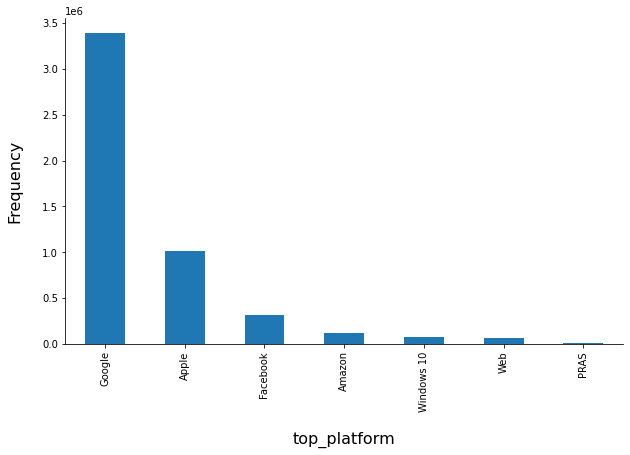

In [18]:
bar_plot_of_feature(data_for_clustering, 'top_platform')

Most of the users, ca. 70%, are from the Google platform. An additional 20% are from Apple, 8% from Facebook, and the remaining users arrive from either Amazon, Windows, Web or PRAS. 

#### level

In [19]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "level")

print("The users in this data set span {} different levels.".format(num_of_unique_values))
print("The lowest level is: {}\nThe highest level is: {}".format(min_value, max_value))

The users in this data set span 1156 different levels.
The lowest level is: 1.0
The highest level is: 1493.0


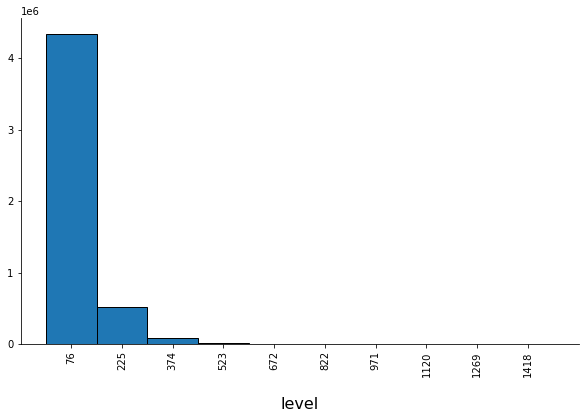

In [20]:
n_bins = 10
hist_of_numerical_feature(data_for_clustering, 'level', n_bins)

The vast majority are users at the lowest levels, with only a fraction of the users at level 300 and above. 

#### trstier

In [21]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "trstier")

print("The users in this data set span {} different tiers.".format(num_of_unique_values))
print("The lowest tier is: {}\nThe highest tier is: {}".format(min_value, max_value))

The users in this data set span 7 different tiers.
The lowest tier is: 1.0
The highest tier is: 7.0


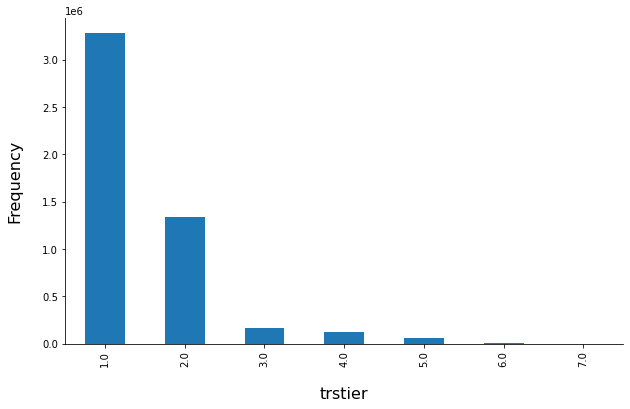

In [22]:
bar_plot_of_feature(data_for_clustering, 'trstier')

#### level_bracket

In [23]:
unique_values = data_for_clustering['level_bracket'].unique().size
print("The users in this data set are from {} different level brackets.".format(unique_values))

The users in this data set are from 10 different level brackets.


In [24]:
print(data_for_clustering['level_bracket'].unique())

['lv_40_79' 'lv_80_119' 'lv_120_139' 'lv_200plus' 'lv_170_199'
 'lv_140_169' 'lv_20_39' 'lv_01_07' 'unknown' 'lv_08_19']


In [25]:
sorted_level_bracket = ['lv_01_07', 'lv_08_19', 'lv_20_39', 'lv_40_79', 'lv_80_119', 'lv_120_139', 'lv_140_169', 'lv_170_199', 'lv_200plus', 'unknown']

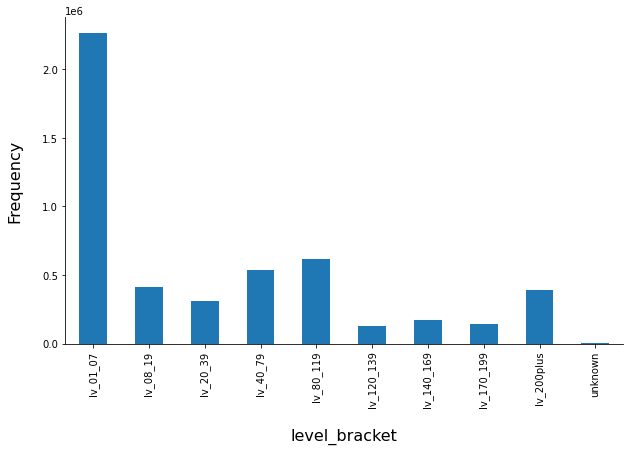

In [26]:
bar_plot_of_feature(data_for_clustering, 'level_bracket', x_labels_sorted = sorted_level_bracket)

About 50% of the users are at the 01 to 07 level bracket. Each of the remaning brackets has 5-10% of the users. 

[back to top](#back_to_top)  <a id='elite_vip_recency'></a>

#### is_elite

In [27]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "is_elite")

print("The users in this data set are either elite, or not.".format(num_of_unique_values))

The users in this data set are either elite, or not.


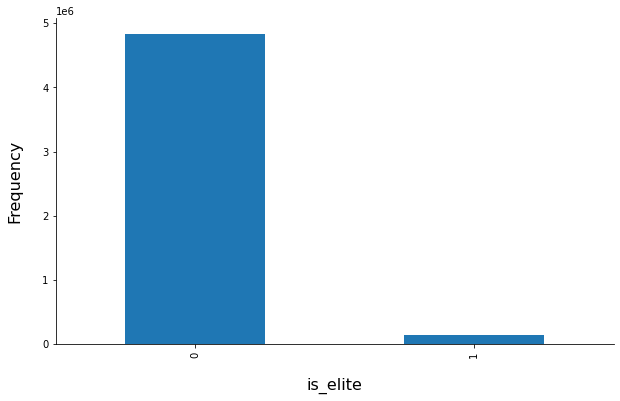

In [28]:
bar_plot_of_feature(data_for_clustering, 'is_elite')

The vast majority of the users are not elite. 

#### is_vip

In [29]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "is_vip")

print("The users in this data set are either vip, or not.".format(num_of_unique_values))

The users in this data set are either vip, or not.


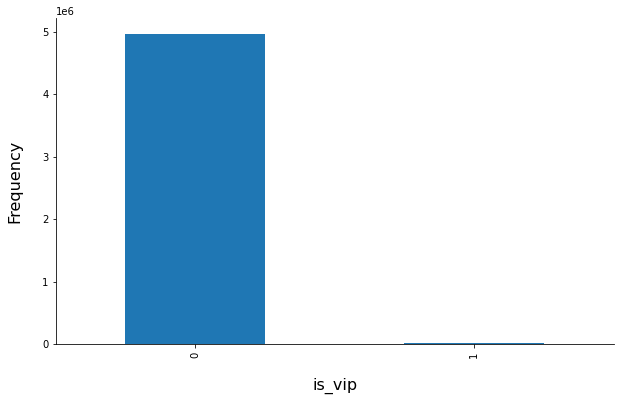

In [30]:
bar_plot_of_feature(data_for_clustering, 'is_vip')

Even fewer users are considered as VIP.

#### llrecency

In [31]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "llrecency")

print("The recency of the users in this data set span {} different values.".format(num_of_unique_values))
print("The shortest time is: {} (in days)\nThe longest time is: {} (in days)".format(min_value, max_value))

The recency of the users in this data set span 1579 different values.
The shortest time is: 1 (in days)
The longest time is: 2540 (in days)


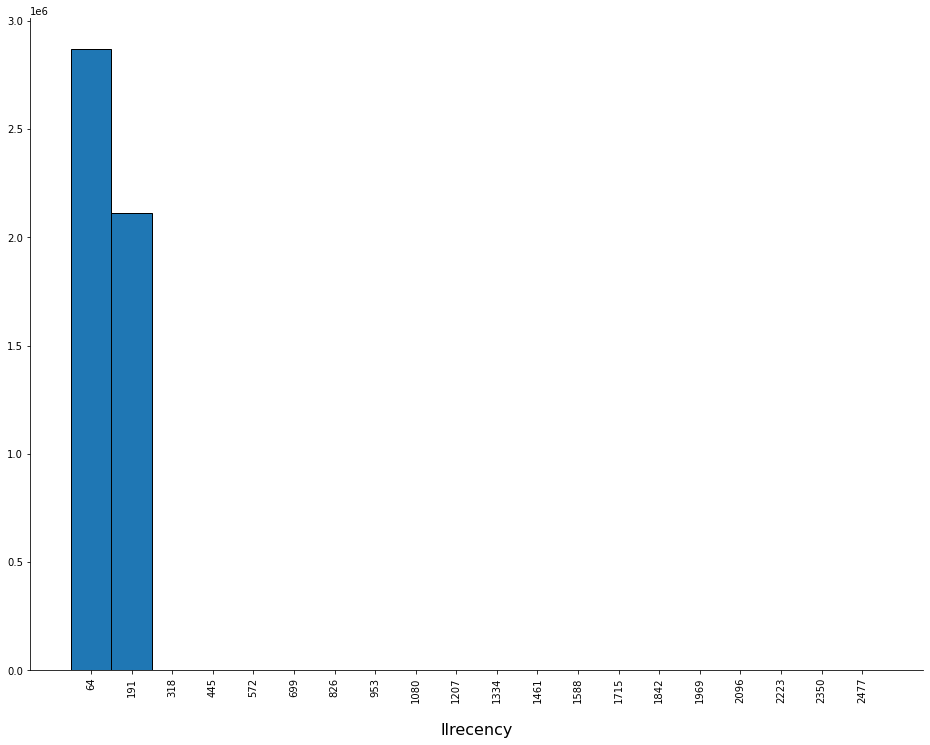

In [32]:
n_bins = 20
figsize = (16, 12)
hist_of_numerical_feature(data_for_clustering, 'llrecency', n_bins, figsize)

Very few of the users in the data set has not been playing at the app in the last 200 days or so. 

[back to top](#back_to_top)  <a id='lifetime_revenue'></a>

#### Lifetime_Revenue_Net

In [33]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Lifetime_Revenue_Net")

print("The net revenue of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest revenue is: {}\nThe highest revenue is: {}".format(min_value, max_value))

The net revenue of the users in this data set span 395460 different values.
The lowest revenue is: -2875.362
The highest revenue is: 410324.438


In [35]:
negative_revenue = len(data_for_clustering[data_for_clustering["Lifetime_Revenue_Net"] < 0])
print("There are {} users with *negative* life time revenue.".format(negative_revenue))

zero_revenue = len(data_for_clustering[data_for_clustering["Lifetime_Revenue_Net"] == 0])
print("\nThere are {} users with *zero* life time revenue.".format(zero_revenue))
print("This is {:.2f}% of the users in the list.".format(zero_revenue/len(data_for_clustering["Lifetime_Revenue_Net"])*100))

positive_revenue = len(data_for_clustering[data_for_clustering["Lifetime_Revenue_Net"] > 0])
below_50_revenue = len(data_for_clustering[(data_for_clustering["Lifetime_Revenue_Net"] > 0) & (data_for_clustering["Lifetime_Revenue_Net"] <= 50)])
below_1000_revenue = len(data_for_clustering[(data_for_clustering["Lifetime_Revenue_Net"] > 0) & (data_for_clustering["Lifetime_Revenue_Net"] <= 1000)])
print("\nThere are {} users with *positive* life time revenue,".format(positive_revenue))
print("of which {} (or {:.2f}% of the users) are users with less than *50* in revenue.".format(below_50_revenue, below_50_revenue/positive_revenue*100))
print("and {} (or {:.2f}% of the users) are users with less than *1000* in revenue.".format(below_1000_revenue, below_1000_revenue/positive_revenue*100))

There are 25 users with *negative* life time revenue.

There are 4190866 users with *zero* life time revenue.
This is 84.06% of the users in the list.

There are 794406 users with *positive* life time revenue,
of which 424356 (or 53.42% of the users) are users with less than *50* in revenue.
and 663064 (or 83.47% of the users) are users with less than *1000* in revenue.


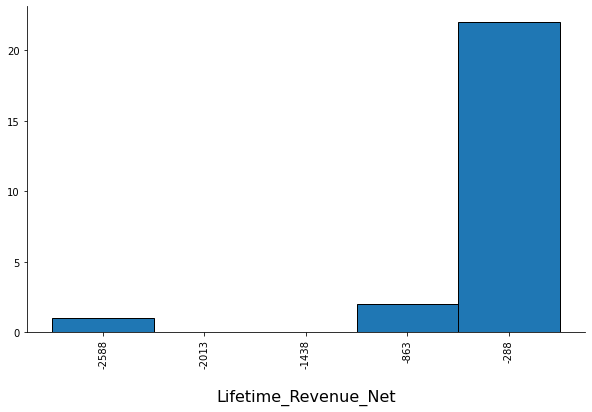

In [36]:
# Plotting the users with negative life-time revenue
n_bins = 5
adjusted_df = data_for_clustering.drop(data_for_clustering[data_for_clustering.Lifetime_Revenue_Net >= 0].index)
hist_of_numerical_feature(adjusted_df, 'Lifetime_Revenue_Net', n_bins)

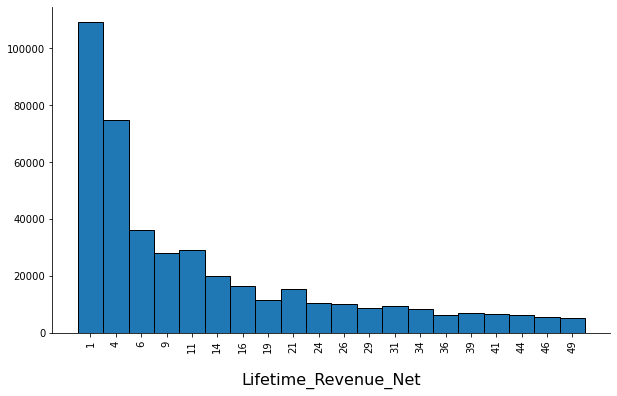

In [37]:
# Plotting the users with positive life-time revenue of below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Lifetime_Revenue_Net <= 0) | (data_for_clustering.Lifetime_Revenue_Net >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'Lifetime_Revenue_Net', n_bins)

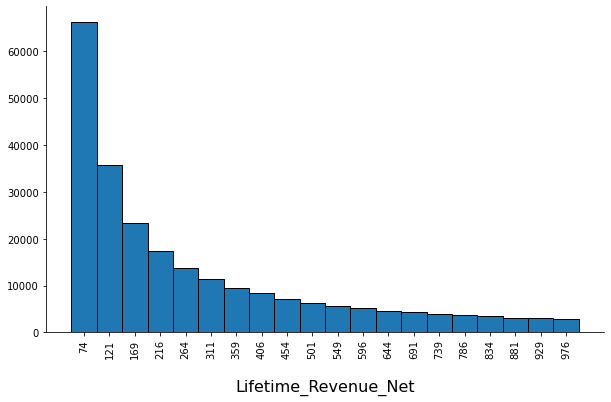

In [38]:
# Plotting the users with positive life-time revenue of above 50 and below 1000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Lifetime_Revenue_Net < 50) | (data_for_clustering.Lifetime_Revenue_Net >= 1000)].index))
hist_of_numerical_feature(adjusted_df, 'Lifetime_Revenue_Net', n_bins)

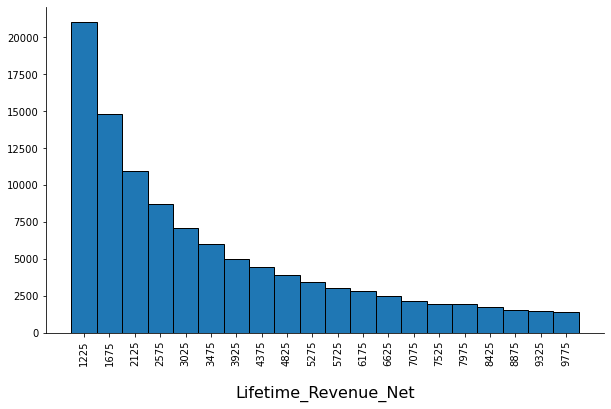

In [39]:
# Plotting the users with positive life-time revenue of above 1000 and below 10000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Lifetime_Revenue_Net < 1000) | (data_for_clustering.Lifetime_Revenue_Net >= 10000)].index))
hist_of_numerical_feature(adjusted_df, 'Lifetime_Revenue_Net', n_bins)

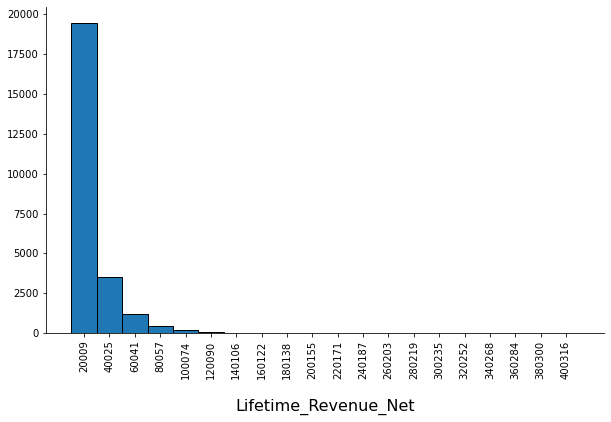

In [40]:
# Plotting the users with life-time revenue of above 10000
n_bins = 20
adjusted_df = data_for_clustering.drop(data_for_clustering[data_for_clustering.Lifetime_Revenue_Net < 10000].index)
hist_of_numerical_feature(adjusted_df, 'Lifetime_Revenue_Net', n_bins)

[back to top](#back_to_top)  <a id='last30d_revenue'></a>

#### Last_30D_Revenue_Net

In [41]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Last_30D_Revenue_Net")

print("The net revenue of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest revenue is: {}\nThe highest revenue is: {}".format(min_value, max_value))

The net revenue of the users in this data set span 98886 different values.
The lowest revenue is: -970.676
The highest revenue is: 20522.3819


In [42]:
negative_revenue = len(data_for_clustering[data_for_clustering["Last_30D_Revenue_Net"] < 0])
print("There are {} users with *negative* last 30 days revenue.".format(negative_revenue))

zero_revenue = len(data_for_clustering[data_for_clustering["Last_30D_Revenue_Net"] == 0])
print("\nThere are {} users with *zero* last 30 days revenue.".format(zero_revenue))
print("This is {:.2f}% of the users in the list.".format(zero_revenue/len(data_for_clustering["Last_30D_Revenue_Net"])*100))

positive_revenue = len(data_for_clustering[data_for_clustering["Last_30D_Revenue_Net"] > 0])
below_50_revenue = len(data_for_clustering[(data_for_clustering["Last_30D_Revenue_Net"] > 0) & (data_for_clustering["Last_30D_Revenue_Net"] <= 50)])
below_1000_revenue = len(data_for_clustering[(data_for_clustering["Last_30D_Revenue_Net"] > 0) & (data_for_clustering["Last_30D_Revenue_Net"] <= 1000)])
print("\nThere are {} users with *positive* last 30 days revenue,".format(positive_revenue))
print("of which {} (or {:.2f}% of the users) are users with less than *50* in revenue.".format(below_50_revenue, below_50_revenue/positive_revenue*100))
print("and {} (or {:.2f}% of the users) are users with less than *1000* in revenue.".format(below_1000_revenue, below_1000_revenue/positive_revenue*100))

There are 21 users with *negative* last 30 days revenue.

There are 4723048 users with *zero* last 30 days revenue.
This is 94.74% of the users in the list.

There are 262228 users with *positive* last 30 days revenue,
of which 172890 (or 65.93% of the users) are users with less than *50* in revenue.
and 254216 (or 96.94% of the users) are users with less than *1000* in revenue.


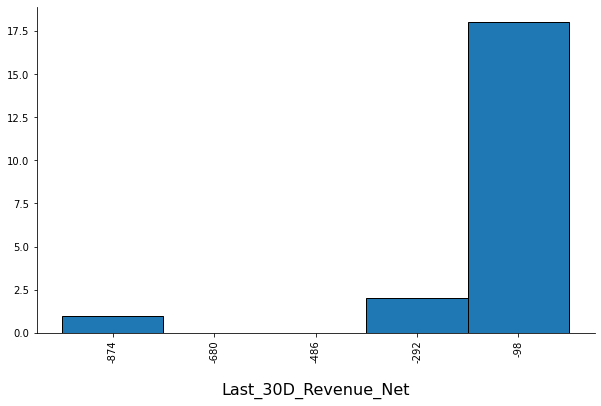

In [43]:
# Plotting the users with negative 30 days revenue
n_bins = 5
adjusted_df = data_for_clustering.drop(data_for_clustering[data_for_clustering.Last_30D_Revenue_Net >= 0].index)
hist_of_numerical_feature(adjusted_df, 'Last_30D_Revenue_Net', n_bins)

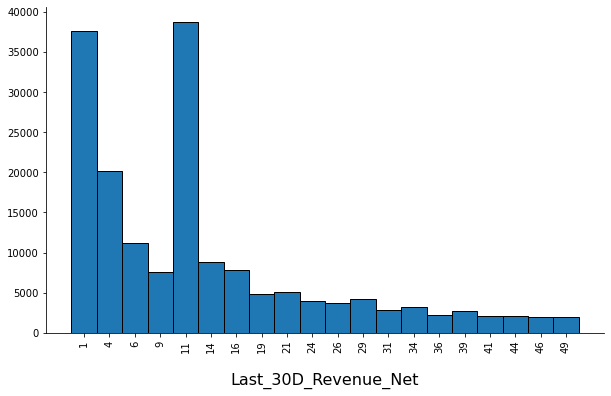

In [44]:
# Plotting the users with positive 30 days revenue of below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_30D_Revenue_Net <= 0) | (data_for_clustering.Last_30D_Revenue_Net >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'Last_30D_Revenue_Net', n_bins)

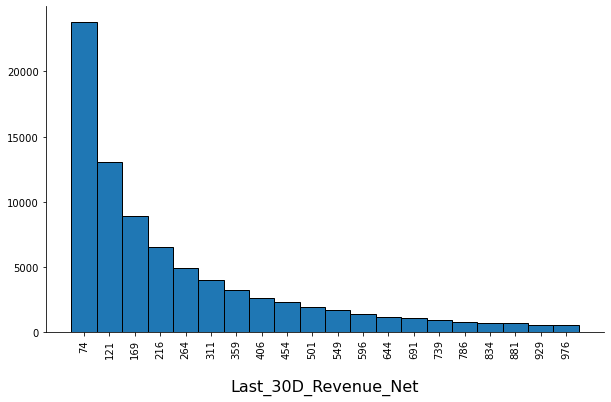

In [45]:
# Plotting the users with positive 30 days revenue of above 50 and below 1000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_30D_Revenue_Net < 50) | (data_for_clustering.Last_30D_Revenue_Net >= 1000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_30D_Revenue_Net', n_bins)

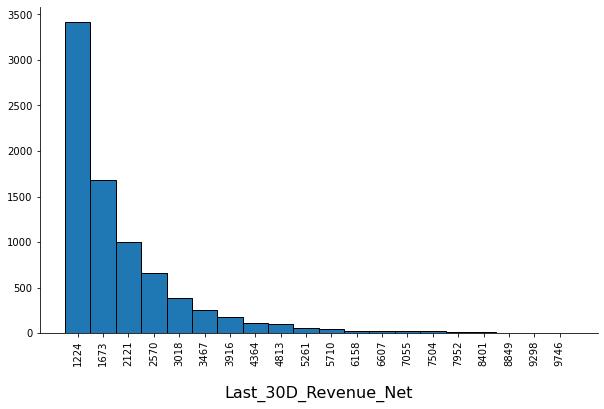

In [46]:
# Plotting the users with positive 30 days revenue of above 1000 and below 10000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_30D_Revenue_Net < 1000) | (data_for_clustering.Last_30D_Revenue_Net >= 10000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_30D_Revenue_Net', n_bins)

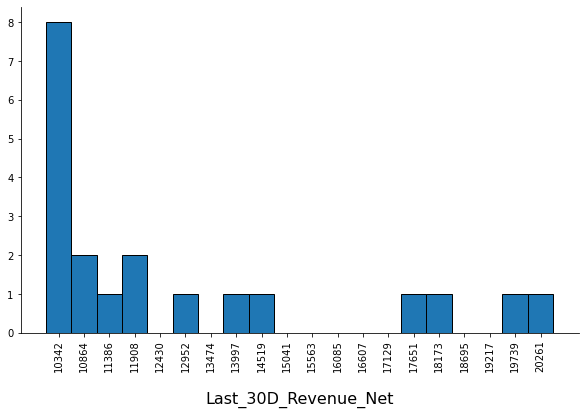

In [47]:
# Plotting the users with 30 days revenue of above 10000
n_bins = 20
adjusted_df = data_for_clustering.drop(data_for_clustering[data_for_clustering.Last_30D_Revenue_Net < 10000].index)
hist_of_numerical_feature(adjusted_df, 'Last_30D_Revenue_Net', n_bins)

[back to top](#back_to_top)  <a id='last90d_revenue'></a>

#### Last_90D_Revenue_Net

In [48]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Last_90D_Revenue_Net")

print("The net revenue of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest revenue is: {}\nThe highest revenue is: {}".format(min_value, max_value))

The net revenue of the users in this data set span 161141 different values.
The lowest revenue is: -1071.6552
The highest revenue is: 48765.5232


In [49]:
negative_revenue = len(data_for_clustering[data_for_clustering["Last_90D_Revenue_Net"] < 0])
print("There are {} users with *negative* last 90 days revenue.".format(negative_revenue))

zero_revenue = len(data_for_clustering[data_for_clustering["Last_90D_Revenue_Net"] == 0])
print("\nThere are {} users with *zero* last 90 days revenue.".format(zero_revenue))
print("This is {:.2f}% of the users in the list.".format(zero_revenue/len(data_for_clustering["Last_90D_Revenue_Net"])*100))

positive_revenue = len(data_for_clustering[data_for_clustering["Last_90D_Revenue_Net"] > 0])
below_50_revenue = len(data_for_clustering[(data_for_clustering["Last_90D_Revenue_Net"] > 0) & (data_for_clustering["Last_90D_Revenue_Net"] <= 50)])
below_1000_revenue = len(data_for_clustering[(data_for_clustering["Last_90D_Revenue_Net"] > 0) & (data_for_clustering["Last_90D_Revenue_Net"] <= 1000)])
print("\nThere are {} users with *positive* last 90 days revenue,".format(positive_revenue))
print("of which {} (or {:.2f}% of the users) are users with less than *50* in revenue.".format(below_50_revenue, below_50_revenue/positive_revenue*100))
print("and {} (or {:.2f}% of the users) are users with less than *1000* in revenue.".format(below_1000_revenue, below_1000_revenue/positive_revenue*100))

There are 28 users with *negative* last 90 days revenue.

There are 4619599 users with *zero* last 90 days revenue.
This is 92.66% of the users in the list.

There are 365670 users with *positive* last 90 days revenue,
of which 219057 (or 59.91% of the users) are users with less than *50* in revenue.
and 337326 (or 92.25% of the users) are users with less than *1000* in revenue.


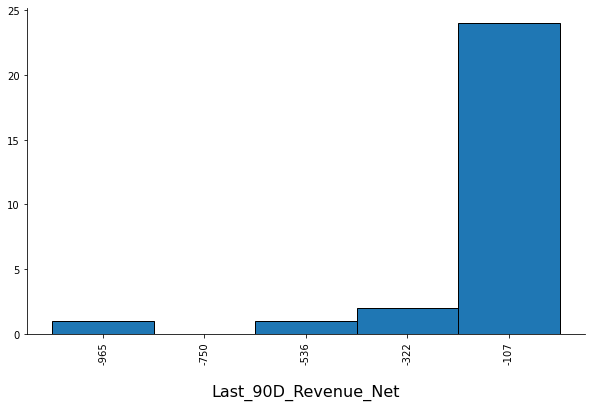

In [50]:
# Plotting the users with negative 90 days revenue
n_bins = 5
adjusted_df = data_for_clustering.drop(data_for_clustering[data_for_clustering.Last_90D_Revenue_Net >= 0].index)
hist_of_numerical_feature(adjusted_df, 'Last_90D_Revenue_Net', n_bins)

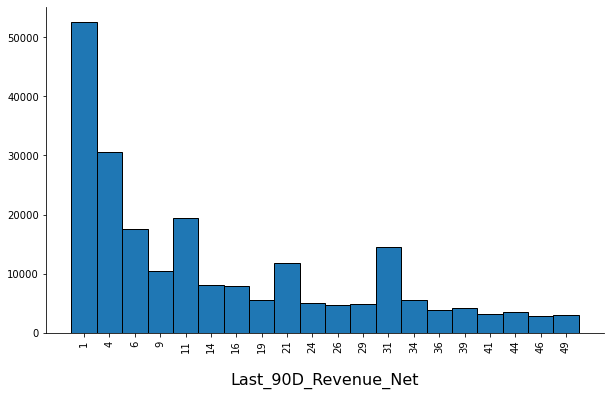

In [51]:
# Plotting the users with positive 90 days revenue of below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_90D_Revenue_Net <= 0) | (data_for_clustering.Last_90D_Revenue_Net >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'Last_90D_Revenue_Net', n_bins)

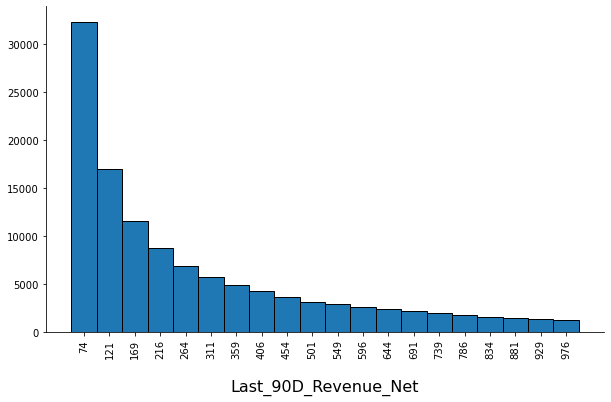

In [52]:
# Plotting the users with positive 90 days revenue of above 50 and below 1000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_90D_Revenue_Net < 50) | (data_for_clustering.Last_90D_Revenue_Net >= 1000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_90D_Revenue_Net', n_bins)

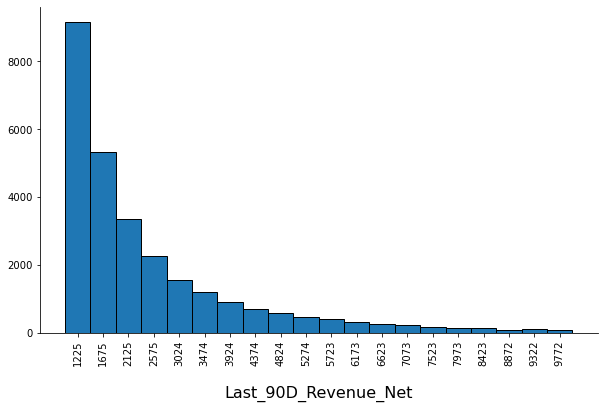

In [53]:
# Plotting the users with positive 90 days revenue of above 1000 and below 10000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_90D_Revenue_Net < 1000) | (data_for_clustering.Last_90D_Revenue_Net >= 10000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_90D_Revenue_Net', n_bins)

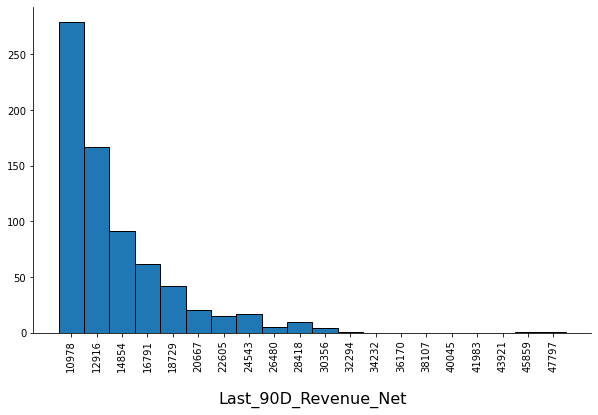

In [54]:
# Plotting the users with 90 days revenue of above 10000
n_bins = 20
adjusted_df = data_for_clustering.drop(data_for_clustering[data_for_clustering.Last_90D_Revenue_Net < 10000].index)
hist_of_numerical_feature(adjusted_df, 'Last_90D_Revenue_Net', n_bins)

[back to top](#back_to_top)  <a id='last30d_transactions'></a>

#### Last_30D_Transactions

In [55]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Last_30D_Transactions")

print("The number of transactions in the last 30 days of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of transactions is: {}\nThe highest is: {}".format(min_value, max_value))

The number of transactions in the last 30 days of the users in this data set span 31 different values.
The lowest number of transactions is: 0
The highest is: 30


In [56]:
zero_transactions = len(data_for_clustering[data_for_clustering["Last_30D_Transactions"] == 0])
print("\nThere are {} users with *zero* last 30 days transactions.".format(zero_transactions))
print("This is {:.2f}% of the users in the list.".format(zero_transactions/len(data_for_clustering["Last_30D_Transactions"])*100))


There are 4723046 users with *zero* last 30 days transactions.
This is 94.74% of the users in the list.


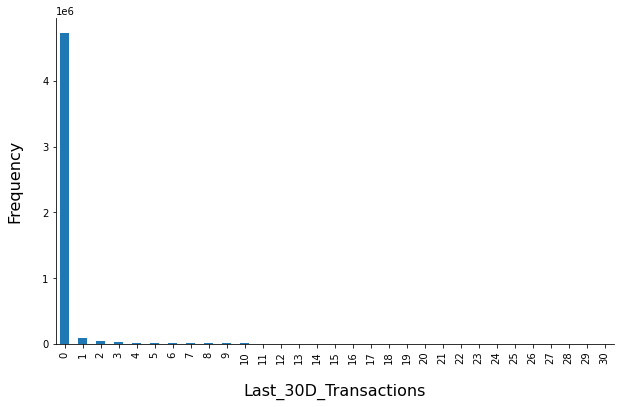

In [57]:
bar_plot_of_feature(data_for_clustering, 'Last_30D_Transactions')

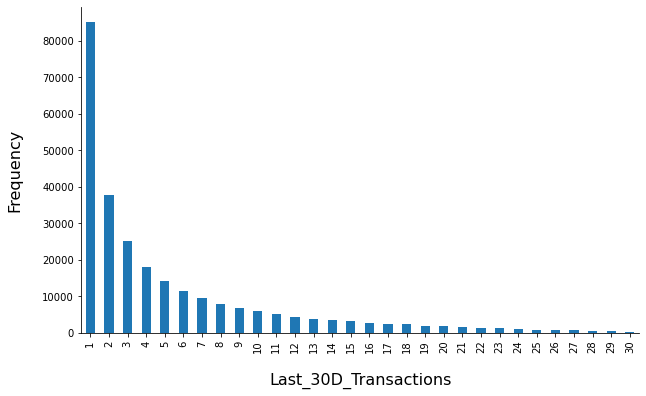

In [58]:
# Plotting the distribution of the users that did at least a single transaction
adjusted_df = data_for_clustering.drop((data_for_clustering[data_for_clustering.Last_30D_Transactions == 0].index))
bar_plot_of_feature(adjusted_df, 'Last_30D_Transactions')

[back to top](#back_to_top)  <a id='sink'></a>

#### Last_30D_Gross_Sink

In [59]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Last_30D_Gross_Sink")

print("The gross sink in the last 30 days of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest sink is: {}\nThe highest is: {}".format(min_value, max_value))

The gross sink in the last 30 days of the users in this data set span 131464 different values.
The lowest sink is: 0.0
The highest is: 8902380.0


In [60]:
zero_sink = len(data_for_clustering[data_for_clustering["Last_30D_Gross_Sink"] == 0])
print("\nThere are {} users with *zero* last 30 days sink.".format(zero_sink))
print("This is {:.2f}% of the users in the list.".format(zero_sink/len(data_for_clustering["Last_30D_Gross_Sink"])*100))


There are 3667571 users with *zero* last 30 days sink.
This is 73.57% of the users in the list.


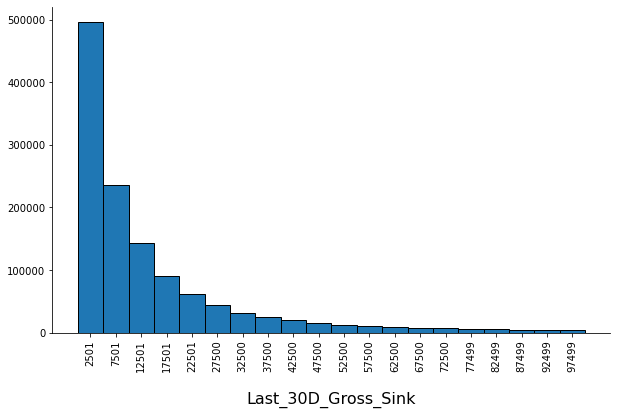

In [61]:
# Plotting the users with positive sink of below 100000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_30D_Gross_Sink <= 0) | (data_for_clustering.Last_30D_Gross_Sink >= 100000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_30D_Gross_Sink', n_bins)

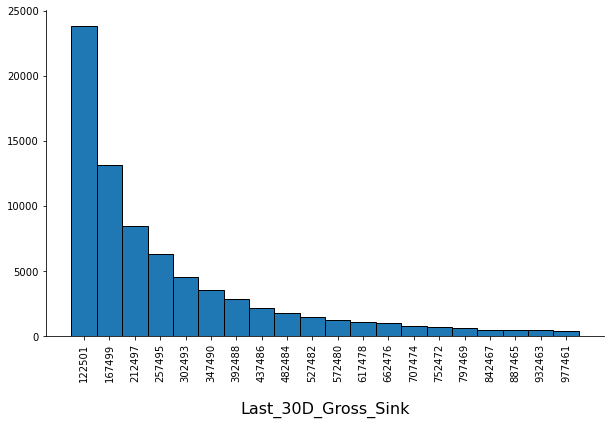

In [62]:
# Plotting the users with positive sink of above 100000 and below 1000000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_30D_Gross_Sink <= 100000) | (data_for_clustering.Last_30D_Gross_Sink >= 1000000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_30D_Gross_Sink', n_bins)

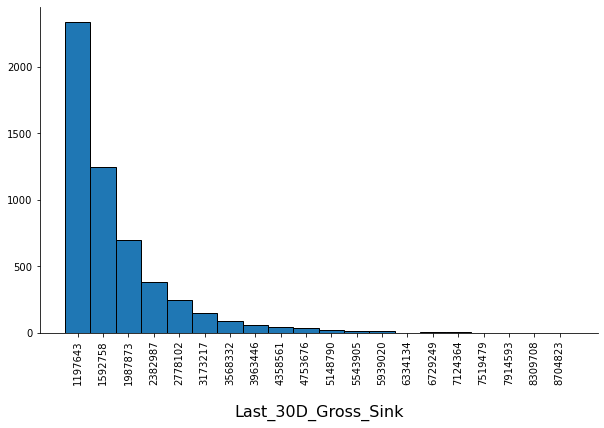

In [63]:
# Plotting the users with positive sink of above 1000000 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_30D_Gross_Sink <= 1000000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_30D_Gross_Sink', n_bins)

#### Last_90D_Gross_Sink

In [64]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Last_90D_Gross_Sink")

print("The gross sink in the last 90 days of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest sink is: {}\nThe highest is: {}".format(min_value, max_value))

The gross sink in the last 90 days of the users in this data set span 251187 different values.
The lowest sink is: 0.0
The highest is: 24284899.0


In [65]:
zero_sink = len(data_for_clustering[data_for_clustering["Last_90D_Gross_Sink"] == 0])
print("\nThere are {} users with *zero* last 90 days sink.".format(zero_sink))
print("This is {:.2f}% of the users in the list.".format(zero_sink/len(data_for_clustering["Last_90D_Gross_Sink"])*100))


There are 3161994 users with *zero* last 90 days sink.
This is 63.43% of the users in the list.


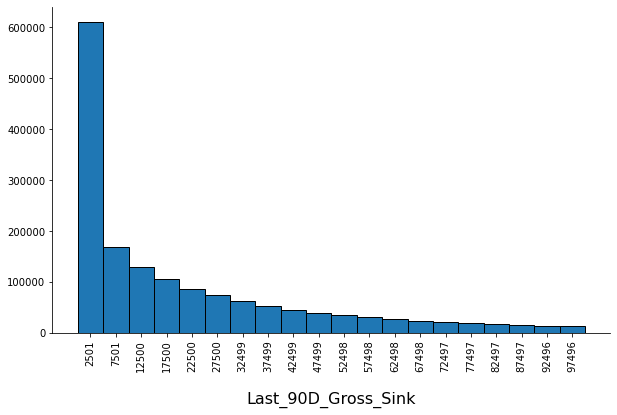

In [66]:
# Plotting the users with positive sink of below 100000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_90D_Gross_Sink <= 0) | (data_for_clustering.Last_90D_Gross_Sink >= 100000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_90D_Gross_Sink', n_bins)

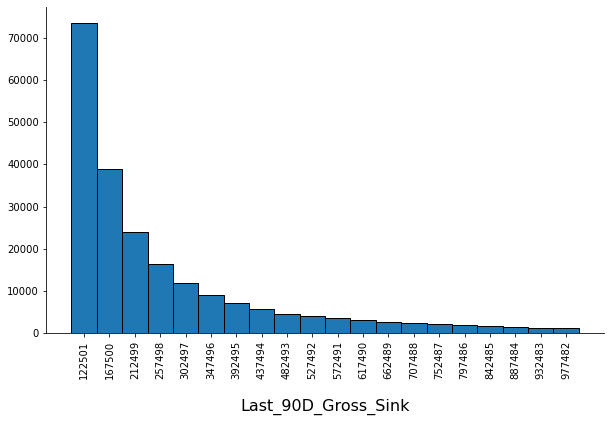

In [67]:
# Plotting the users with positive sink of above 100000 and below 1000000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_90D_Gross_Sink <= 100000) | (data_for_clustering.Last_90D_Gross_Sink >= 1000000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_90D_Gross_Sink', n_bins)

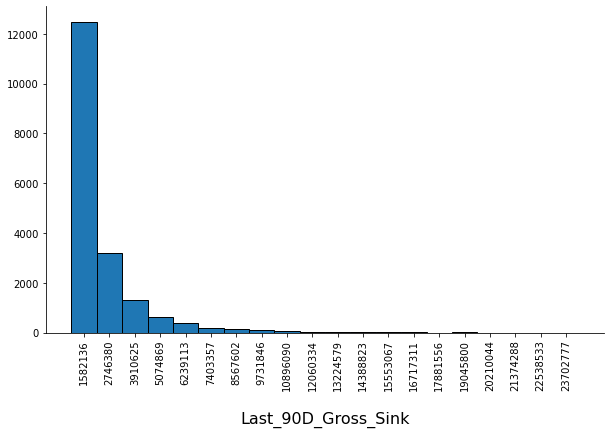

In [68]:
# Plotting the users with positive sink of above 1000000 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Last_90D_Gross_Sink <= 1000000)].index))
hist_of_numerical_feature(adjusted_df, 'Last_90D_Gross_Sink', n_bins)

[back to top](#back_to_top)  <a id='login_days'></a>

#### Last_30D_Login_days

In [69]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Last_30D_Login_days")

print("The number of login-days in the last 30 days of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of login-days is: {}\nThe is: {}".format(min_value, max_value))

The number of login-days in the last 30 days of the users in this data set span 31 different values.
The lowest number of login-days is: 0
The is: 30


In [70]:
zero_logindays = len(data_for_clustering[data_for_clustering["Last_30D_Login_days"] == 0])
print("\nThere are {} users with *zero* last 30 days login-days.".format(zero_logindays))
print("This is {:.2f}% of the users in the list.".format(zero_logindays/len(data_for_clustering["Last_30D_Login_days"])*100))


There are 3482986 users with *zero* last 30 days login-days.
This is 69.87% of the users in the list.


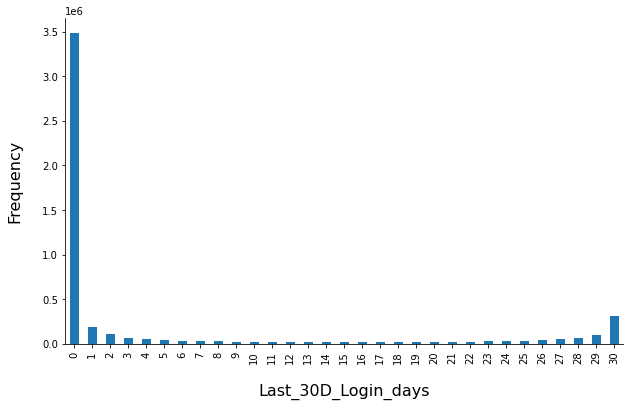

In [71]:
sorted_days = [days for days in range(31)]
bar_plot_of_feature(data_for_clustering, 'Last_30D_Login_days', x_labels_sorted = sorted_days)

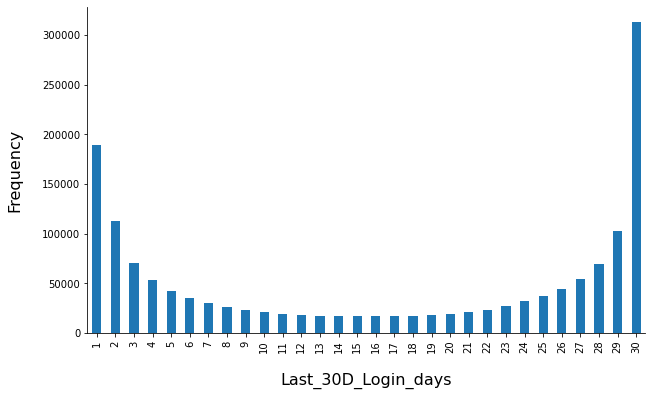

In [72]:
# Plotting the distribution of the users that had at least a single login
adjusted_df = data_for_clustering.drop((data_for_clustering[data_for_clustering.Last_30D_Login_days == 0].index))
sorted_days = [days for days in range(1,31)]
bar_plot_of_feature(adjusted_df, 'Last_30D_Login_days', x_labels_sorted = sorted_days)

#### Last_90D_Login_days

In [73]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Last_90D_Login_days")

print("The number of login-days in the last 90 days of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of login-days is: {}\nThe highest is: {}".format(min_value, max_value))

The number of login-days in the last 90 days of the users in this data set span 91 different values.
The lowest number of login-days is: 0
The highest is: 90


In [74]:
zero_logindays = len(data_for_clustering[data_for_clustering["Last_90D_Login_days"] == 0])
print("\nThere are {} users with *zero* last 90 days login-days.".format(zero_logindays))
print("This is {:.2f}% of the users in the list.".format(zero_logindays/len(data_for_clustering["Last_90D_Login_days"])*100))


There are 2865639 users with *zero* last 90 days login-days.
This is 57.48% of the users in the list.


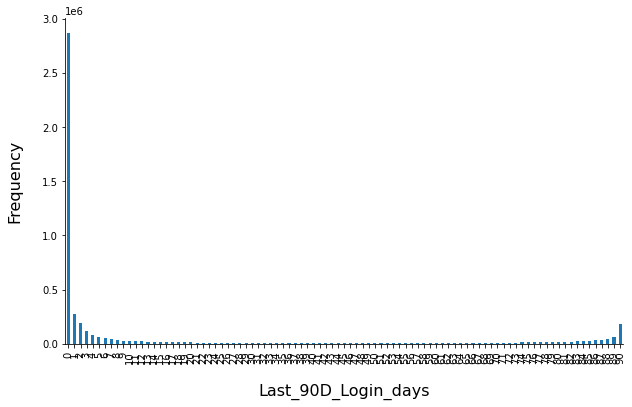

In [75]:
sorted_days = [days for days in range(91)]
bar_plot_of_feature(data_for_clustering, 'Last_90D_Login_days', x_labels_sorted = sorted_days)

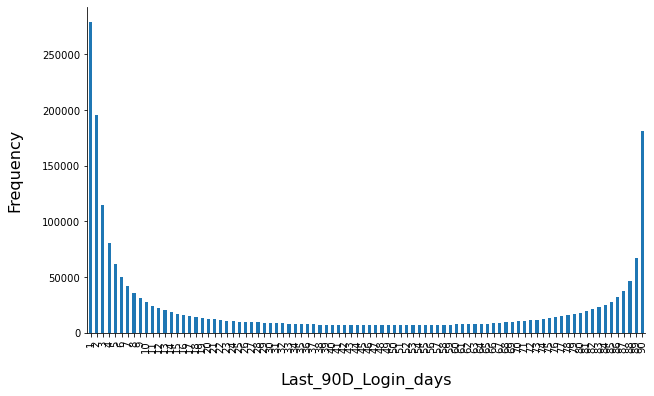

In [76]:
# Plotting the distribution of the users that had at least a single login
adjusted_df = data_for_clustering.drop((data_for_clustering[data_for_clustering.Last_90D_Login_days == 0].index))
sorted_days = [days for days in range(1,91)]
bar_plot_of_feature(adjusted_df, 'Last_90D_Login_days', x_labels_sorted = sorted_days)

#### Life_Time_Login_Days

In [77]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "Life_Time_Login_Days")

print("The number of login days of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of days is: {}\nThe highest is: {}".format(min_value, max_value))

The number of login days of the users in this data set span 3489 different values.
The lowest number of days is: 1
The highest is: 3628


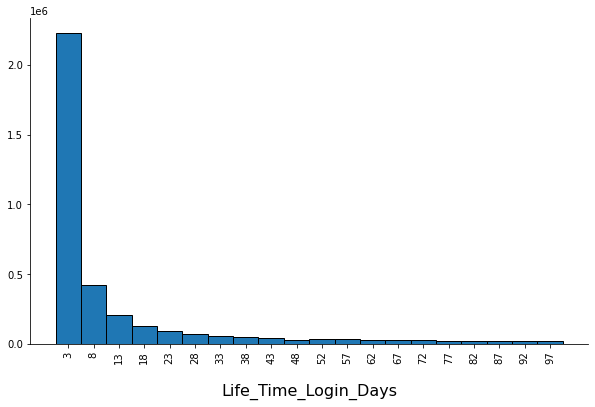

In [78]:
# Plotting the users with login days of below 100
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Life_Time_Login_Days >= 100)].index))
hist_of_numerical_feature(adjusted_df, 'Life_Time_Login_Days', n_bins)

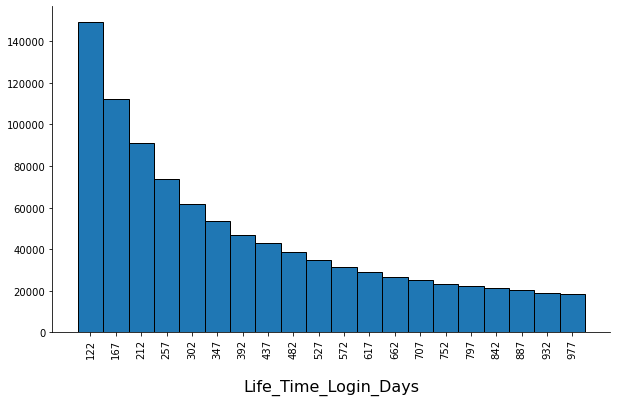

In [79]:
# Plotting the users with login days of above 100 and below 1000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Life_Time_Login_Days < 100) | (data_for_clustering.Life_Time_Login_Days >= 1000)].index))
hist_of_numerical_feature(adjusted_df, 'Life_Time_Login_Days', n_bins)

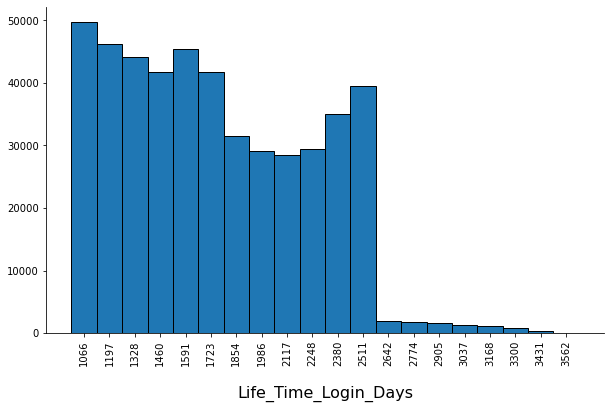

In [80]:
# Plotting the users with login days of above 1000 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.Life_Time_Login_Days < 1000)].index))
hist_of_numerical_feature(adjusted_df, 'Life_Time_Login_Days', n_bins)

[back to top](#back_to_top)  <a id='credit_eod'></a>

#### credits_balance_EOD

In [81]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "credits_balance_EOD")

print("The number of credits balance of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of credits is: {}\nThe highest is: {}".format(min_value, max_value))

The number of credits balance of the users in this data set span 58895 different values.
The lowest number of credits is: 0.0
The highest is: 15173803.0


In [82]:
zero_balance = len(data_for_clustering[data_for_clustering["credits_balance_EOD"] == 0])
print("\nThere are {} users with *zero* credits balance at end of day.".format(zero_balance))
print("This is {:.2f}% of the users in the list.".format(zero_balance/len(data_for_clustering["credits_balance_EOD"])*100))


There are 34954 users with *zero* credits balance at end of day.
This is 0.70% of the users in the list.


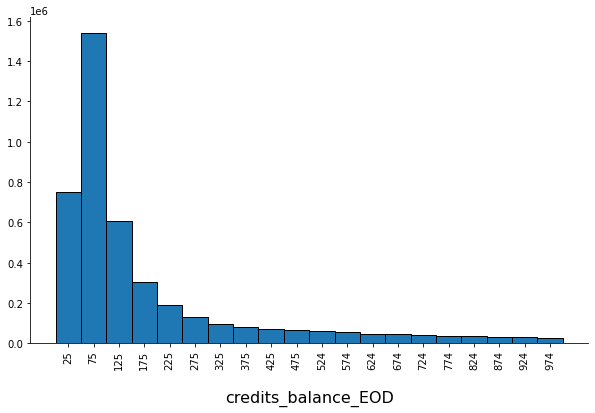

In [83]:
# Plotting the users with credit balance of below 1000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.credits_balance_EOD < 0) | (data_for_clustering.credits_balance_EOD >= 1000)].index))
hist_of_numerical_feature(adjusted_df, 'credits_balance_EOD', n_bins)

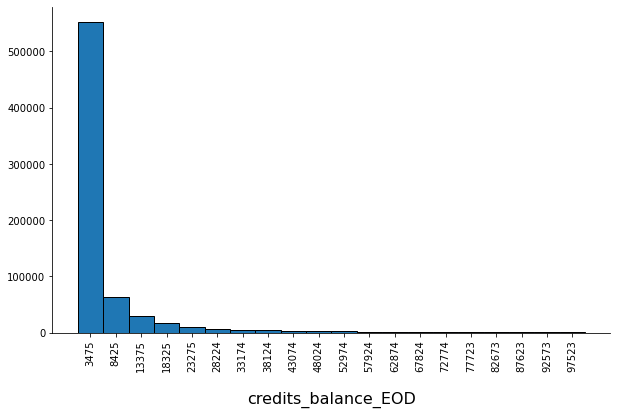

In [84]:
# Plotting the users with credit balance of above 1000 and below 100000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.credits_balance_EOD < 1000) | (data_for_clustering.credits_balance_EOD >= 100000)].index))
hist_of_numerical_feature(adjusted_df, 'credits_balance_EOD', n_bins)

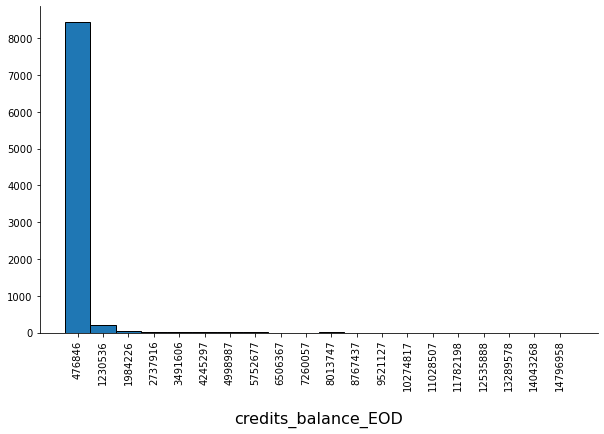

In [85]:
# Plotting the users with credit balance of above 100000 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.credits_balance_EOD < 100000) ].index))
hist_of_numerical_feature(adjusted_df, 'credits_balance_EOD', n_bins)

[back to top](#back_to_top)  <a id='coins_eod'></a>

#### coins_balance_EOD

In [86]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "coins_balance_EOD")

print("The number of coins balance of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of coins is: {}\nThe highest is: {}".format(min_value, max_value))

The number of coins balance of the users in this data set span 788290 different values.
The lowest number of coins is: 0.0
The highest is: 1511280804.0


In [87]:
zero_balance = len(data_for_clustering[data_for_clustering["coins_balance_EOD"] == 0])
print("\nThere are {} users with *zero* coins balance at end of day.".format(zero_balance))
print("This is {:.2f}% of the users in the list.".format(zero_balance/len(data_for_clustering["coins_balance_EOD"])*100))


There are 591 users with *zero* coins balance at end of day.
This is 0.01% of the users in the list.


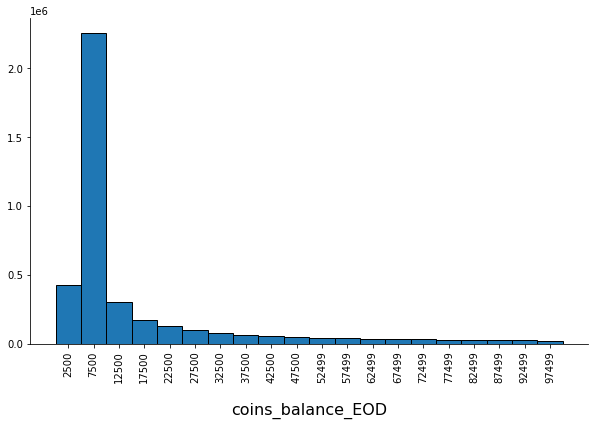

In [88]:
# Plotting the users with coins balance of below 100000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.coins_balance_EOD < 0) | (data_for_clustering.coins_balance_EOD >= 100000)].index))
hist_of_numerical_feature(adjusted_df, 'coins_balance_EOD', n_bins)

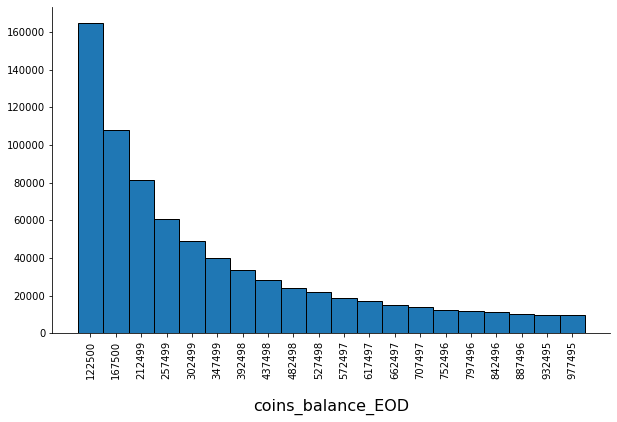

In [89]:
# Plotting the users with coins balance of above 100000 and below 1000000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.coins_balance_EOD < 100000) | (data_for_clustering.coins_balance_EOD >= 1000000)].index))
hist_of_numerical_feature(adjusted_df, 'coins_balance_EOD', n_bins)

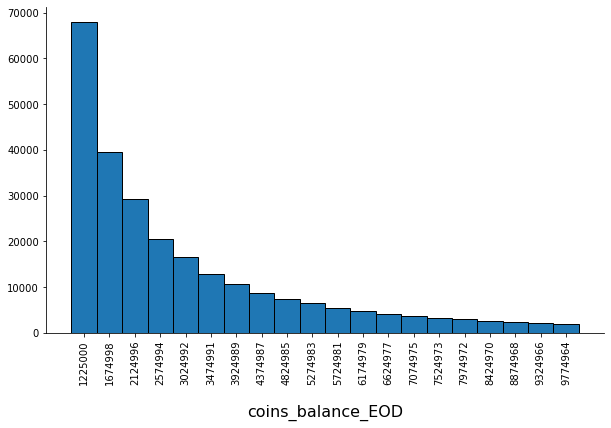

In [90]:
# Plotting the users with coins balance of above 1000000 and below 10000000
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.coins_balance_EOD < 1000000) | (data_for_clustering.coins_balance_EOD > 10000000)].index))
hist_of_numerical_feature(adjusted_df, 'coins_balance_EOD', n_bins)

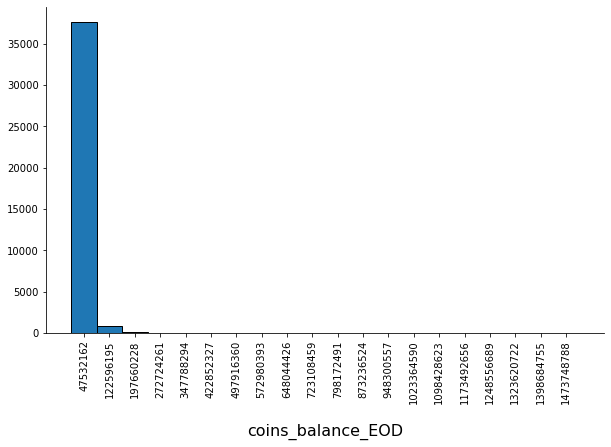

In [91]:
# Plotting the users with coins balance of above 10000000 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.coins_balance_EOD < 10000000)].index))
hist_of_numerical_feature(adjusted_df, 'coins_balance_EOD', n_bins)

[back to top](#back_to_top)  <a id='bingo_rounds'></a>

#### number_of_bingo_rounds

In [92]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "number_of_bingo_rounds")

print("The number of bingo rounds of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of rounds is: {}\nThe highest is: {}".format(min_value, max_value))

The number of bingo rounds of the users in this data set span 302 different values.
The lowest number of rounds is: 0
The highest is: 433


In [93]:
zero_rounds = len(data_for_clustering[data_for_clustering["number_of_bingo_rounds"] == 0])
print("\nThere are {} users with *zero* rounds.".format(zero_rounds))
print("This is {:.2f}% of the users in the list.".format(zero_rounds/len(data_for_clustering["number_of_bingo_rounds"])*100))


There are 4395201 users with *zero* rounds.
This is 88.16% of the users in the list.


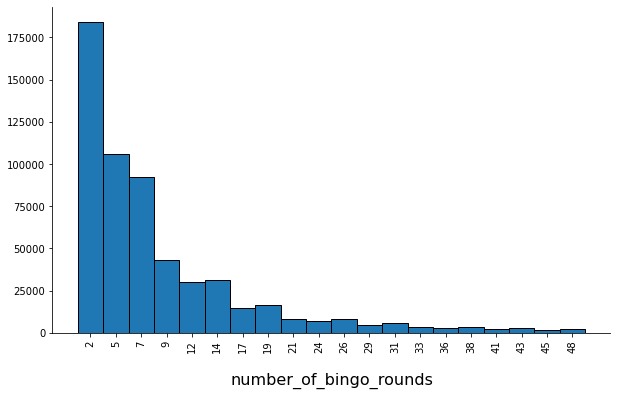

In [94]:
# Plotting the users with rounds of above 0 and below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.number_of_bingo_rounds == 0) | (data_for_clustering.number_of_bingo_rounds >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'number_of_bingo_rounds', n_bins)

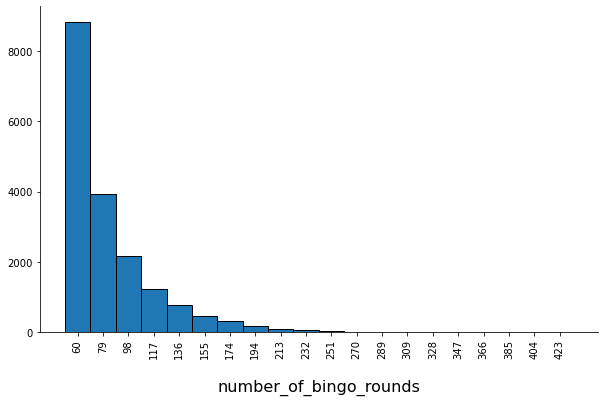

In [95]:
# Plotting the users with rounds of above 50 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.number_of_bingo_rounds < 50)].index))
hist_of_numerical_feature(adjusted_df, 'number_of_bingo_rounds', n_bins)

[back to top](#back_to_top)  <a id='total_rounds_modes_1_3'></a>

#### total_rounds_mode_1

In [96]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "total_rounds_mode_1")

print("The number of rounds mode 1 of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of rounds is: {}\nThe highest is: {}".format(min_value, max_value))

The number of rounds mode 1 of the users in this data set span 240 different values.
The lowest number of rounds is: 0
The highest is: 366


In [97]:
zero_rounds = len(data_for_clustering[data_for_clustering["total_rounds_mode_1"] == 0])
print("\nThere are {} users with *zero* rounds mode 1.".format(zero_rounds))
print("This is {:.2f}% of the users in the list.".format(zero_rounds/len(data_for_clustering["total_rounds_mode_1"])*100))


There are 4680342 users with *zero* rounds mode 1.
This is 93.88% of the users in the list.


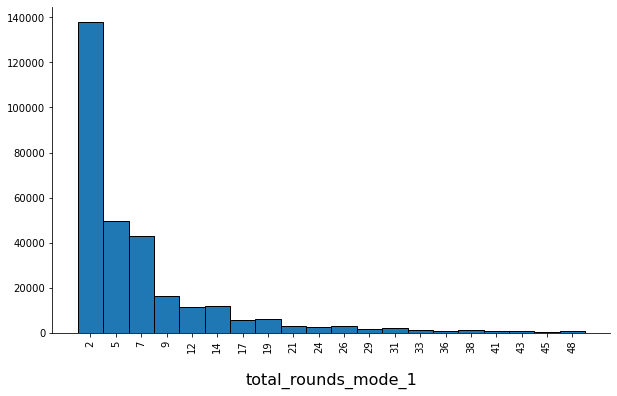

In [98]:
# Plotting the users with rounds of above 0 and below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_1 == 0) | (data_for_clustering.total_rounds_mode_1 >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_1', n_bins)

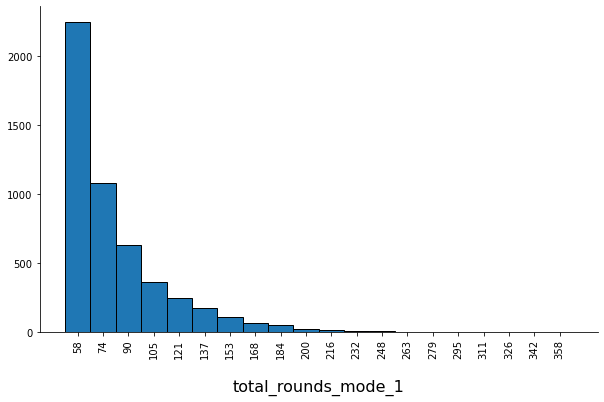

In [99]:
# Plotting the users with rounds of above 50 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_1 < 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_1', n_bins)

#### total_rounds_mode_2

In [100]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "total_rounds_mode_2")

print("The number of rounds mode 2 of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of rounds is: {}\nThe highest is: {}".format(min_value, max_value))

The number of rounds mode 2 of the users in this data set span 231 different values.
The lowest number of rounds is: 0
The highest is: 318


In [101]:
zero_rounds = len(data_for_clustering[data_for_clustering["total_rounds_mode_2"] == 0])
print("\nThere are {} users with *zero* rounds mode 2.".format(zero_rounds))
print("This is {:.2f}% of the users in the list.".format(zero_rounds/len(data_for_clustering["total_rounds_mode_2"])*100))


There are 4737672 users with *zero* rounds mode 2.
This is 95.03% of the users in the list.


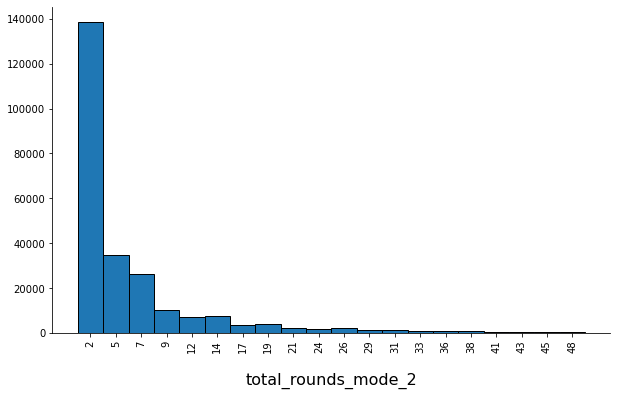

In [102]:
# Plotting the users with rounds of above 0 and below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_2 == 0) | (data_for_clustering.total_rounds_mode_2 >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_2', n_bins)

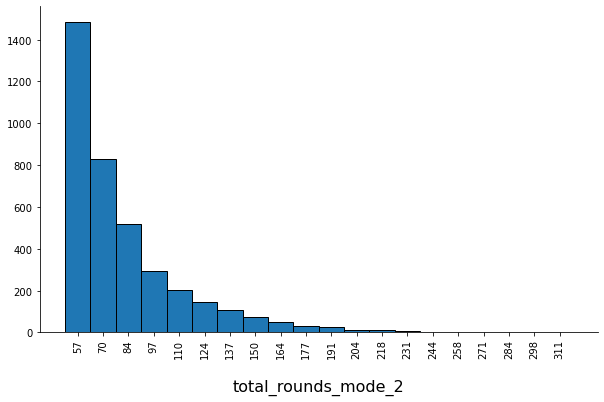

In [103]:
# Plotting the users with rounds of above 50 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_2 < 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_2', n_bins)

#### total_rounds_mode_3

In [104]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "total_rounds_mode_3")

print("The number of rounds mode 3 of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of rounds is: {}\nThe highest is: {}".format(min_value, max_value))

The number of rounds mode 3 of the users in this data set span 171 different values.
The lowest number of rounds is: 0
The highest is: 272


In [105]:
zero_rounds = len(data_for_clustering[data_for_clustering["total_rounds_mode_3"] == 0])
print("\nThere are {} users with *zero* rounds mode 3.".format(zero_rounds))
print("This is {:.2f}% of the users in the list.".format(zero_rounds/len(data_for_clustering["total_rounds_mode_3"])*100))


There are 4866608 users with *zero* rounds mode 3.
This is 97.62% of the users in the list.


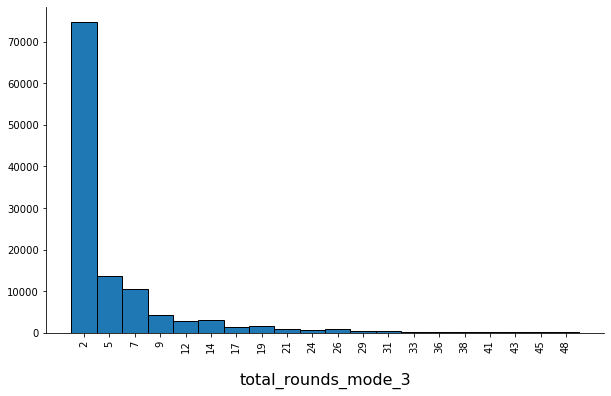

In [106]:
# Plotting the users with rounds of above 0 and below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_3 == 0) | (data_for_clustering.total_rounds_mode_3 >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_3', n_bins)

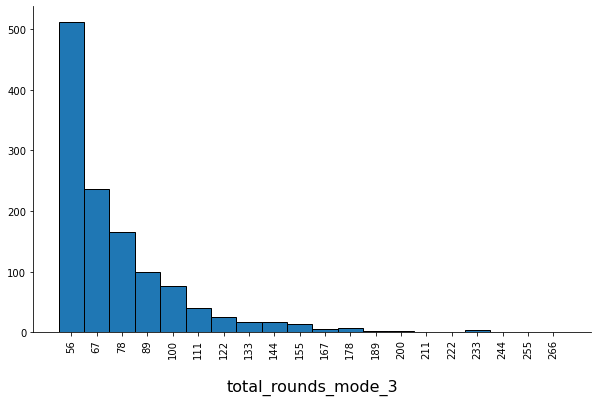

In [107]:
# Plotting the users with rounds of above 50 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_3 < 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_3', n_bins)

[back to top](#back_to_top)  <a id='total_rounds_modes_4_6'></a>

#### total_rounds_mode_4

In [108]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "total_rounds_mode_4")

print("The number of rounds mode 4 of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of rounds is: {}\nThe highest is: {}".format(min_value, max_value))

The number of rounds mode 4 of the users in this data set span 160 different values.
The lowest number of rounds is: 0
The highest is: 267


In [109]:
zero_rounds = len(data_for_clustering[data_for_clustering["total_rounds_mode_4"] == 0])
print("\nThere are {} users with *zero* rounds mode 4.".format(zero_rounds))
print("This is {:.2f}% of the users in the list.".format(zero_rounds/len(data_for_clustering["total_rounds_mode_4"])*100))


There are 4906060 users with *zero* rounds mode 4.
This is 98.41% of the users in the list.


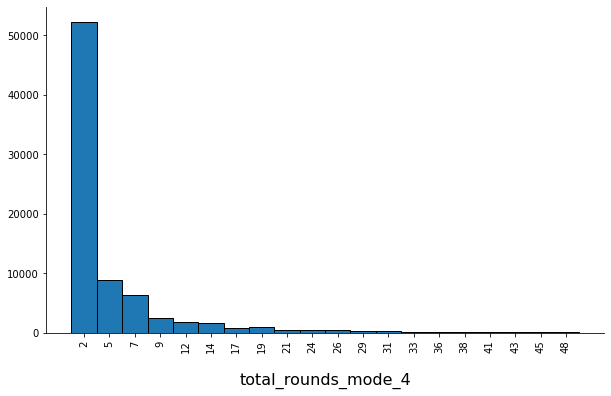

In [110]:
# Plotting the users with rounds of above 0 and below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_4 == 0) | (data_for_clustering.total_rounds_mode_4 >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_4', n_bins)

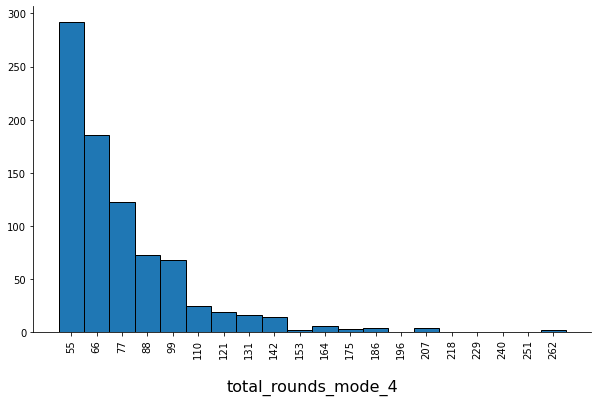

In [111]:
# Plotting the users with rounds of above 50 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_4 < 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_4', n_bins)

#### total_rounds_mode_5

In [112]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "total_rounds_mode_5")

print("The number of rounds mode 5 of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of rounds is: {}\nThe highest is: {}".format(min_value, max_value))

The number of rounds mode 5 of the users in this data set span 152 different values.
The lowest number of rounds is: 0
The highest is: 238


In [113]:
zero_rounds = len(data_for_clustering[data_for_clustering["total_rounds_mode_5"] == 0])
print("\nThere are {} users with *zero* rounds mode 5.".format(zero_rounds))
print("This is {:.2f}% of the users in the list.".format(zero_rounds/len(data_for_clustering["total_rounds_mode_5"])*100))


There are 4941411 users with *zero* rounds mode 5.
This is 99.12% of the users in the list.


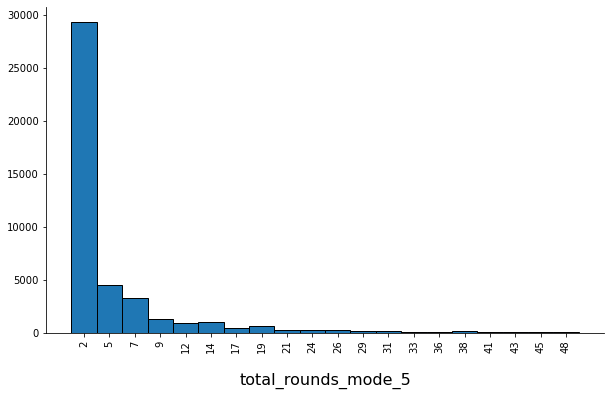

In [114]:
# Plotting the users with rounds of above 0 and below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_5 == 0) | (data_for_clustering.total_rounds_mode_5 >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_5', n_bins)

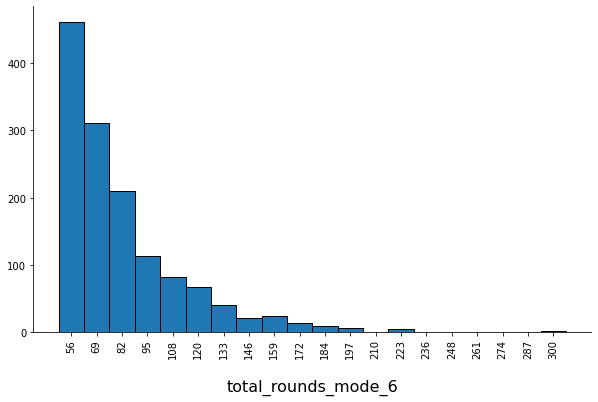

In [115]:
# Plotting the users with rounds of above 50 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_6 < 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_6', n_bins)

#### total_rounds_mode_6

In [116]:
num_of_unique_values, min_value, max_value = get_basic_feature_char(data_for_clustering, "total_rounds_mode_6")

print("The number of rounds mode 6 of the users in this data set span {} different values.".format(num_of_unique_values))
print("The lowest number of rounds is: {}\nThe highest is: {}".format(min_value, max_value))

The number of rounds mode 6 of the users in this data set span 194 different values.
The lowest number of rounds is: 0
The highest is: 306


In [117]:
zero_rounds = len(data_for_clustering[data_for_clustering["total_rounds_mode_6"] == 0])
print("\nThere are {} users with *zero* rounds mode 6.".format(zero_rounds))
print("This is {:.2f}% of the users in the list.".format(zero_rounds/len(data_for_clustering["total_rounds_mode_6"])*100))


There are 4962171 users with *zero* rounds mode 6.
This is 99.54% of the users in the list.


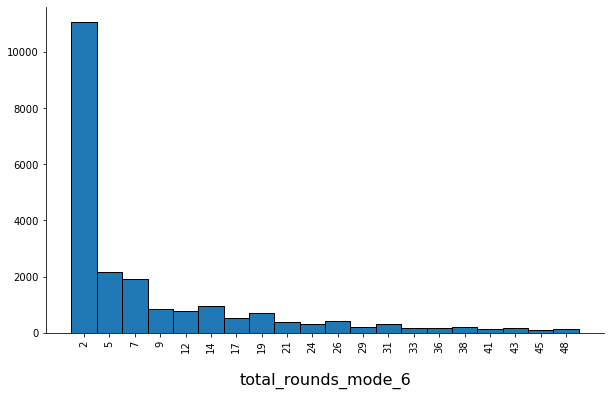

In [118]:
# Plotting the users with rounds of above 0 and below 50
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_6 == 0) | (data_for_clustering.total_rounds_mode_6 >= 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_6', n_bins)

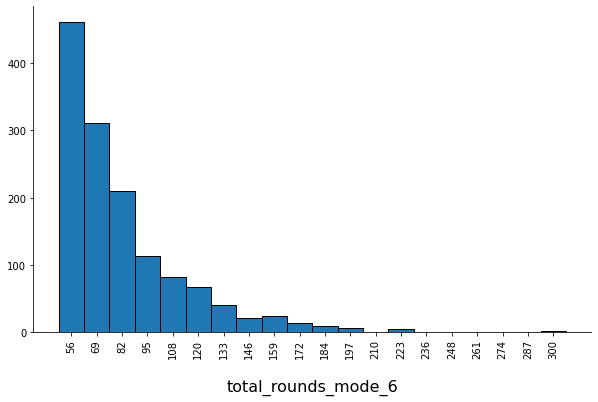

In [119]:
# Plotting the users with rounds of above 50 
n_bins = 20
adjusted_df = data_for_clustering.drop((data_for_clustering[(data_for_clustering.total_rounds_mode_6 < 50)].index))
hist_of_numerical_feature(adjusted_df, 'total_rounds_mode_6', n_bins)